In [1]:
import ROOT
ROOT.EnableImplicitMT()
RDF = ROOT.ROOT.RDataFrame
from matplotlib import pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)
import glob, os
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process   .kernels import RBF, ConstantKernel as C,  DotProduct, Matern
import matplotlib.gridspec as gridspec
#from gp_signal import GPnew, Signal as ESC
cols = ['#4285f4','#ea4335','#fbbc05','#34a853', '#a00498', '#536267']

Welcome to JupyROOT 6.28/04


In [3]:
# with open('root_files.txt') as f:
#     lines = f.readlines()

lines = glob.glob('slim_out_trip3/*root')
    
qcd = ROOT.TChain('events')

for file in lines:

    if ('QCD' in file and 'madgraph' in file):
        qcd.Add(file)

df = {}
df['qcd'] = RDF(qcd)

In [5]:
regions=[]
regions.append({'name':'region_1','cuts':'ak4_HT>550 && sixpt>40 && jmds6332<1.25 && jtrip_masym <0.25 && jtrip_delta>250 && jtrip_mds<0.05 && jtrip_qgl>1 && jtrip_qgt>0','bins':[102*2,100,610]}) #
regions.append({'name':'region_2','cuts':'ak4_HT>550 && sixpt>50 && jmds6332<1.25 && jtrip_masym <0.175 && jtrip_delta>180 && jtrip_mds<0.175 && jtrip_qgl>1 && jtrip_qgt>0','bins':[90*2,300,1200]}) #
regions.append({'name':'region_3','cuts':'ak4_HT>550 && sixpt>100 && jmds6332<0.9 && jtrip_masym <0.15 && jtrip_delta>150 && jtrip_mds<0.2 && jtrip_qgl>1 && jtrip_qgt>0','bins':[99*2,520,2500]}) #
# regions.append({'name':'run2_invqgl','cuts':'ak4_HT>550 && sixpt>100 && jmds6332<0.9 && jtrip_masym <0.15 && jtrip_delta>150 && jtrip_mds<0.2 && jtrip_qgl>1 && jtrip_qgt>0','bins':[99,520,2500]})

mass_hists={}

jtrip_shift = {}
jtrip_shift['qcd'] = 'jtrip_mass'

for reg in regions:
    mass_hists[reg['name']]={}
    for names in df.keys():
        mass_hists[reg['name']][names] = df[names].Define('corr_mass_'+names,jtrip_shift[names]).Filter(reg['cuts']).Histo1D(('mass_hists_'+reg['name']+'_'+names,'mass_hists_'+reg['name']+'_'+names,reg['bins'][0],reg['bins'][1],reg['bins'][2]),'corr_mass_'+names)

for reg in regions:
    mass_hists[reg['name']]['data'].Add(mass_hists[reg['name']]['qcd'].GetValue())

runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Define(basic_string_view<char,char_traits<char> > name, basic_string_view<char,char_traits<char> > expression) =>
    runtime_error: GetBranchNames: error in opening the tree events

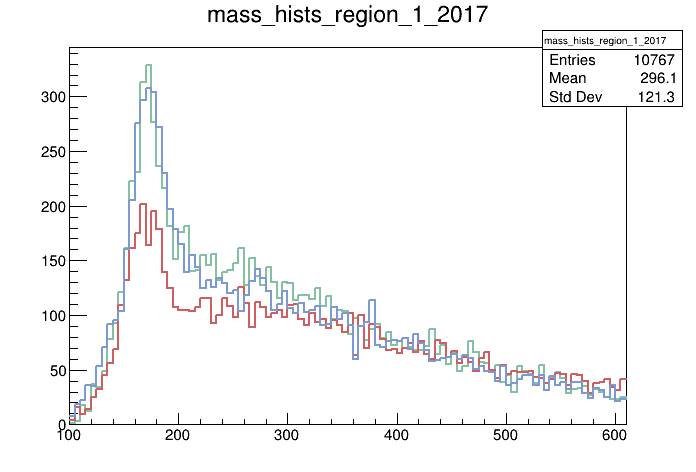

In [7]:
c1=ROOT.TCanvas()
c1.cd()
# regions[0]['h_a_nq'].SetLineColor(38)
# regions[0]['h_a_nq'].Draw()
# regions[0]['h_a_nq_cor'].Draw('same')
mass_hists['region_1']['2017'].SetLineColor(30)
mass_hists['region_1']['2017'].SetLineWidth(2)
mass_hists['region_1']['2017'].Rebin()
mass_hists['region_1']['2017'].Draw('same')
mass_hists['region_1']['2018'].SetLineColor(46)
mass_hists['region_1']['2018'].SetLineWidth(2)
mass_hists['region_1']['2018'].Rebin()
mass_hists['region_1']['2018'].Draw('same')
mass_hists['region_1']['2016'].SetLineColor(38)
mass_hists['region_1']['2016'].SetLineWidth(2)
mass_hists['region_1']['2016'].Rebin()
mass_hists['region_1']['2016'].Draw('same')
# regions[0]['h_a_nq_ttbar'].Draw('same')
c1.Draw()

In [ ]:
file = ROOT.TFile('resolved_FDhist.root',"RECREATE")                                
file.cd()
for i in range(len(regions)):
    regions[i]['h_a_nq_2017'].Write()
    regions[i]['h_a_nq_2018'].Write()
    regions[i]['h_a_nq_2016'].Write()
file.Close()   

102 102 102 88 88 88


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


242**2 * RBF(length_scale=138)
Using Lenght scale 138.0
(102, 1) (102, 1) (102,)


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


198**2 * RBF(length_scale=139) + 346**2 * Signal(mass=165, width=15.9)


/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:99: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/tmp/ipykernel_43490/1396306834.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='Total Prediction')


1.1430311939595548
13.53965370304718
0.9902998819825861


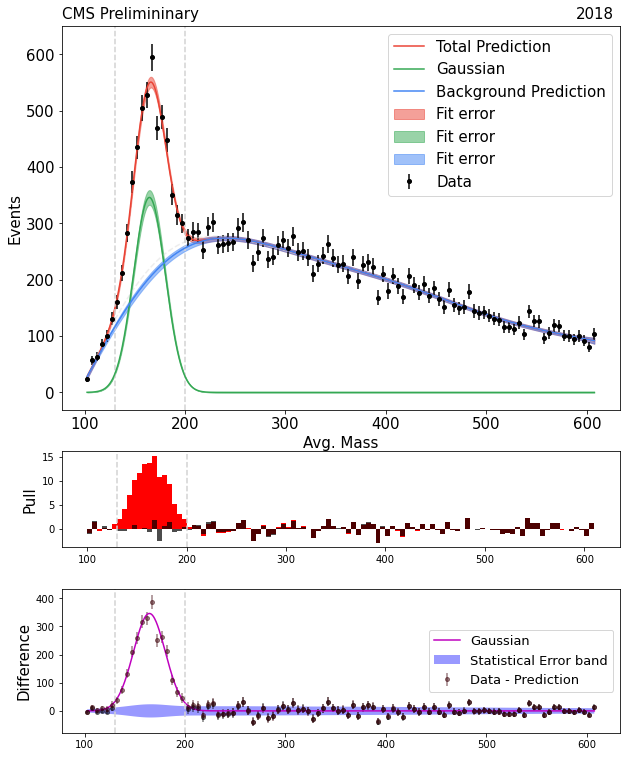

102 102 102 88 88 88


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


271**2 * RBF(length_scale=122)
Using Lenght scale 122.0
(102, 1) (102, 1) (102,)


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


359**2 * RBF(length_scale=142) + 439**2 * Signal(mass=170, width=14.3)


/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:99: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 135.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/tmp/ipykernel_43490/1396306834.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='Total Prediction')


0.951589131156321
15.78591613037317
0.9345479100040917


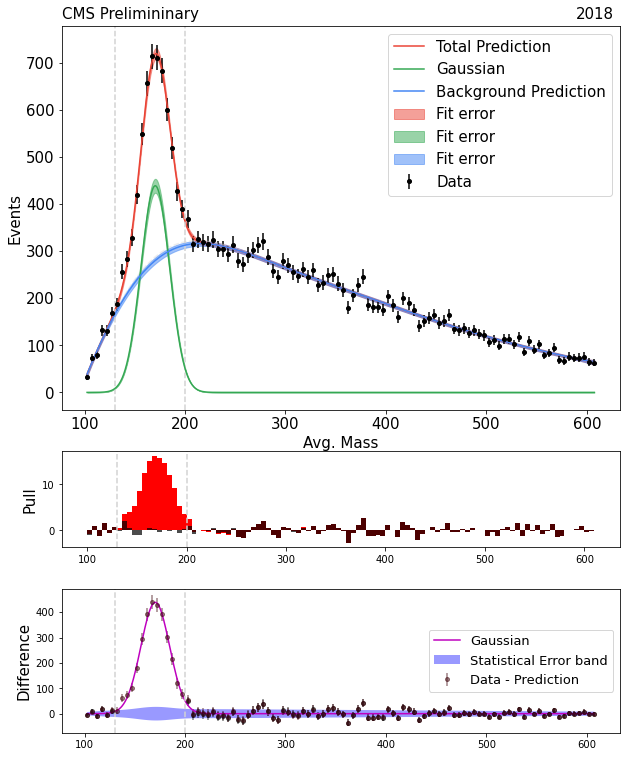

102 102 102 88 88 88


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


206**2 * RBF(length_scale=109)
Using Lenght scale 109.0
(102, 1) (102, 1) (102,)


/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


218**2 * RBF(length_scale=118) + 476**2 * Signal(mass=168, width=14.7)


/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:99: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/miniforge3/envs/l1ad/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 135.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/tmp/ipykernel_43490/1396306834.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='Total Prediction')


1.1238332064736942
18.650842392808027
1.056242206591378


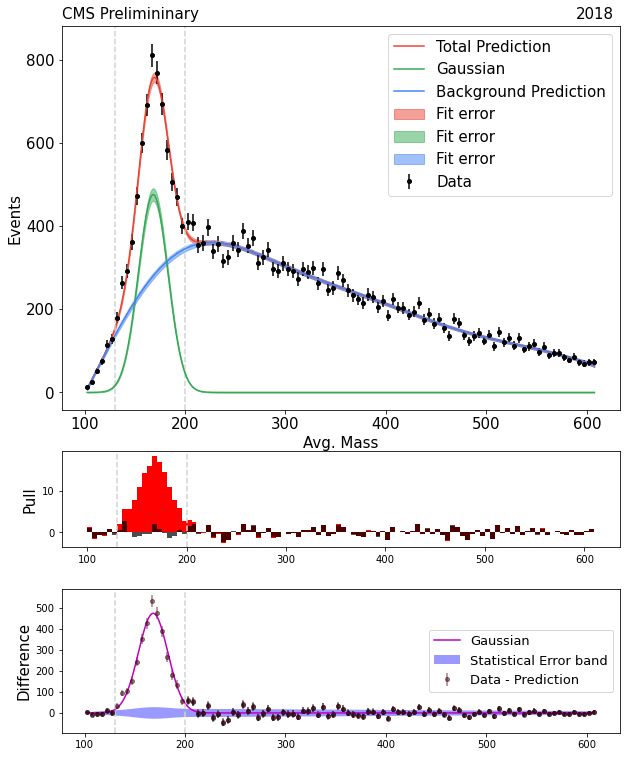

In [ ]:
for plot in ['h_a_nq_2018','h_a_nq_2016','h_a_nq_2017']:
    x=[]
    y=[]
    dy=[]
    xc=[]
    yc=[]
    dyc=[]
    h = regions[0][plot]
    sig_m=170
    sig_s=15
    sig_m_bounds=(150,190)
    sig_s_bounds=(7, 20)
    for i in range(1,h.GetNbinsX()+1):
        if(h.GetBinContent(i)):
            x.append(h.GetBinCenter(i))
            y.append(h.GetBinContent(i))
            dy.append(h.GetBinError(i))
            if((h.GetBinCenter(i)<130 or h.GetBinCenter(i)>200)):
                xc.append(h.GetBinCenter(i))
                yc.append(h.GetBinContent(i))
                dyc.append(h.GetBinError(i))
    print(len(x),len(y),len(dy),len(xc),len(yc),len(dyc))


    X = np.atleast_2d(x).T
    Y = np.atleast_2d(y).T
    dy = np.array(dy)

    Xc = np.atleast_2d(xc).T
    Yc = np.atleast_2d(yc).T
    dyc = np.array(dyc)
    # kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=40.0, length_scale_bounds=(40, 100.0), nu=11.5)
    # kernel = kernel + 
    # kernel = C(1.0, (1e-3, 1e3)) * RBF(30, (30, 1e3))

    kernel = C(1.0, (1e-3, 1e16)) * RBF(200, (10, 1e16))
    gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
    gp.fit(Xc, Yc)
    print(gp.kernel_)
    print('Using Lenght scale', float(str(gp.kernel_).split('=')[-1].split(')')[0]))

    ls  = float(str(gp.kernel_).split('=')[-1].split(')')[0])

    kernel = C(1.0, (1e-3, 1e16)) * RBF(ls, (ls, 500)) + C(1.0, (1e-3, 1e16)) * ESC(mass = sig_m, mass_bounds = sig_m_bounds , width = sig_s, width_bounds = sig_s_bounds)
    # Fit for unmasked Data
    print(X.shape, Y.shape, dy.shape)
    gp = GPnew(kernel=kernel, alpha=dy**2, n_restarts_optimizer=30)
    gp.fit(X, Y)
    XC = np.atleast_2d(np.linspace(x[0], x[-1], num=1000)).T
    Y_pred, sigma = gp.predict(X, return_std=True)
    YC_pred, sigmaC = gp.predict(XC, return_std=True)
    print(gp.kernel_)
    YC_sig, sigmaC_sig = gp.predict_partial(XC,return_std=True,kx = 'k2')
    YC_bkg, sigmaC_bkg = gp.predict_partial(XC,return_std=True,kx = 'k1')
    Y_bkg, sigma_bkg = gp.predict_partial(X,return_std=True,kx = 'k1')
    # kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=100.0, length_scale_bounds=(100, 2000.0), nu=10.5)

    kernel = C(1.0, (1e-3, 1e16)) * RBF(200, (135, 1e3))
    #Fit for masked Data
    gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
    gp.fit(Xc, Yc)
    XCc = np.atleast_2d(np.linspace(xc[0], xc[-1], num=1000)).T
    Yc_pred, sigmac = gp.predict(Xc, return_std=True)
    YCc_pred, sigmaCc = gp.predict(XCc, return_std=True)
    Y_p, sig = gp.predict(X, return_std=True)

    # with plt.xkcd():
    fig = plt.figure(figsize=(10, 13))
    spec = fig.add_gridspec(ncols=1, nrows=3,height_ratios=[0.8,0.2,0.3])
    main = fig.add_subplot(spec[0,0])
    main.plot(XCc.flatten(), YCc_pred.flatten(), '--', color='gainsboro', alpha=0.5)
    # main.fill_between(XCc.flatten(),YCc_pred.flatten()-1*sigmaCc, YCc_pred.flatten()+1*sigmaCc, alpha=.5, fc='navy', ec='None', label='95% confidence interval')
    main.text(0.0, 1.05,'CMS Prelimininary ', ha='left', va='top', transform=main.transAxes, fontsize=15)
    main.text(0.99, 1.05,r'2018', ha='right', va='top', transform=main.transAxes, fontsize=15)
    main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='Total Prediction')
    main.fill_between(XC.flatten(),YC_pred.flatten()-1*sigmaC, YC_pred.flatten()+1*sigmaC, alpha=.5, fc='k', ec='None',color=cols[1], label='Fit error')
    main.errorbar(X.flatten(), Y.flatten(), dy, fmt='.', color='k',markersize=8,alpha=1.0, label='Data')
    # main.errorbar(Xc.flatten(), Yc.flatten(), dyc, fmt='.',color='k', markersize=8,alpha=.8, label='Masked Data')
    main.set_ylabel('Events', fontsize=15)
    main.axvline(x=130, color='lightgrey', linestyle='--')
    main.axvline(x=200, color='lightgrey', linestyle='--')
    main.set_xlabel('Avg. Mass', fontsize=15)
    main.tick_params(axis='y', labelsize=15)
    main.tick_params(axis='x', labelsize=15)
    main.plot(XC.flatten(),YC_sig.flatten(),color=cols[3],label='Gaussian')
    main.plot(XC.flatten(),YC_bkg.flatten(),color=cols[0],label='Background Prediction')
    main.fill_between(XC.flatten(),YC_sig.flatten()-sigmaC_sig.flatten(),YC_sig.flatten()+sigmaC_sig.flatten(),color=cols[3],alpha=.5,label='Fit error')
    main.fill_between(XC.flatten(),YC_bkg.flatten()-sigmaC_bkg.flatten(),YC_bkg.flatten()+sigmaC_bkg.flatten(),color=cols[0],alpha=.5,label='Fit error')
    main.legend(loc='best', fontsize=15)
    # main.set_yscale('log')
    # main.set_ylim(0.9,1000)
    # main.plot(XCc.flatten(), YCc_pred.flatten()-YC_pred.flatten(), 'm-', label='Difference B/n predictions')
    # main.fill_between(XCc.flatten(), (YCc_pred.flatten()-YC_pred.flatten())-1*sigmaCc, (YCc_pred.flatten()-YC_pred.flatten())+1*sigmaCc,alpha=.5, fc='m' )
    pull = fig.add_subplot(spec[1,0])
    pull.bar(X.flatten(),((Y.flatten()-Y_p.flatten())/dy),width=h.GetBinWidth(1),color='r', alpha=1)
    pull.bar(X.flatten(),((Y.flatten()-Y_pred.flatten())/dy),width=h.GetBinWidth(1),color='k', alpha=0.7)
    pull.set_ylabel('Pull',fontsize=15)
    pull.axvline(x=130, color='lightgrey', linestyle='--')
    pull.axvline(x=200, color='lightgrey', linestyle='--')
    print(np.sum(((Y.flatten()-Y_pred.flatten())/dy)**2)/(len(x)-1))
    print(np.sum(((Y.flatten()-Y_p.flatten())/dy)**2)/(len(x)-1))
    print(np.sum(((Yc.flatten()-Yc_pred.flatten())/dyc)**2)/(len(x)-1))
    diff = fig.add_subplot(spec[2,0])
    diff.plot(XCc.flatten(), YC_pred.flatten()-YC_bkg.flatten(), 'm-', label='Gaussian')
    # diff.fill_between(XCc.flatten(), (YC_pred.flatten()-YC_bkg.flatten())-1*sigmaCc, (YC_pred.flatten()-YC_bkg.flatten())+1*sigmaCc,alpha=.5, fc='m',label='Error on difference' )
    diff.fill_between(XC.flatten(), np.sqrt(YC_pred.flatten()), -np.sqrt(YC_pred.flatten()),alpha=.4, fc='b' , label='Statistical Error band')
    diff.set_ylabel('Difference',fontsize=15)
    # diff.errorbar(xt, yt, dyt, fmt='.',color='b', markersize=8,alpha=1, label='ttbar MC prediction')
    diff.errorbar(Xc.flatten(), Yc.flatten()-Yc_pred.flatten(), dyc, fmt='.',color='k', markersize=8,alpha=.5)
    diff.errorbar(X.flatten(), Y.flatten()-Y_bkg.flatten(), dy, fmt='.', color='#3c0008',markersize=8,alpha=0.5, label='Data - Prediction')
    diff.legend(loc='right',fontsize=13)
    diff.axvline(x=130, color='lightgrey', linestyle='--')
    diff.axvline(x=200, color='lightgrey', linestyle='--')
    np.max(YC_pred.flatten()-YC_bkg.flatten())
    plt.show()

102 102 102 86 86 86
1.12e+03**2 * RBF(length_scale=131)
Using Lenght scale 131.0
(102, 1) (102, 1) (102,)
523**2 * RBF(length_scale=131) + 1.42e+03**2 * Signal(mass=168, width=15.4)


/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:101: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:101: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/mambaforge/envs/l1ad/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 135.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipykernel_199432/1367623905.py:85: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='

1.0059053942821854
48.36854759367836
0.798786063929187


1415.1936309979938

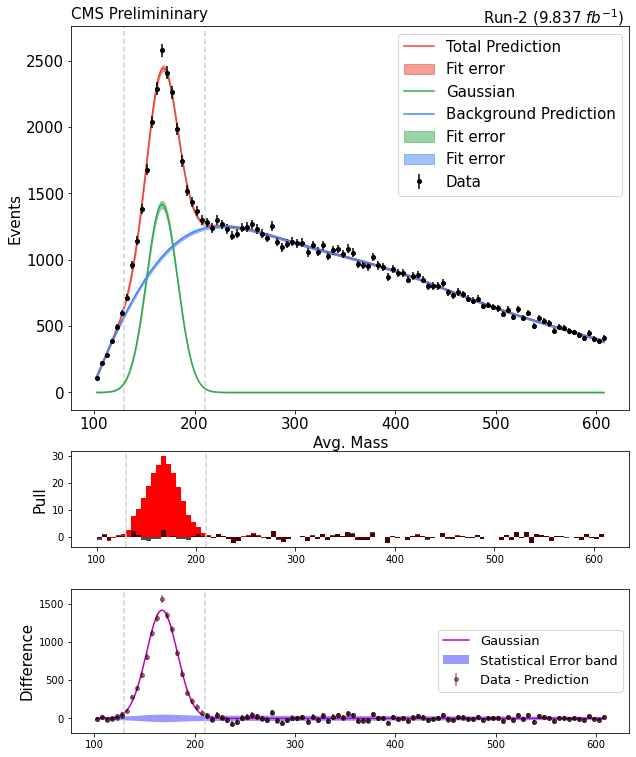

In [ ]:
x=[]
y=[]
dy=[]
xc=[]
yc=[]
dyc=[]
h = mass_hists['region_1']['data'].Clone('h_mass')
h.Rebin(2)
# regions[0]['h_a_nq_2018'].Clone('h_mass')
# h.Add(regions[0]['h_a_nq_2017'])
# h.Add(regions[0]['h_a_nq_2016'])

# myFile = ROOT.TFile("resolved_FDhist.root", "RECREATE")
# myFile.cd()
# regions[0]['h_a_nq_2017'].
# myFile.Close()  

sig_m=170
sig_s=15
sig_m_bounds=(150,190)
sig_s_bounds=(7, 20)
for i in range(1,h.GetNbinsX()+1):
    if(h.GetBinContent(i)):
        x.append(h.GetBinCenter(i))
        y.append(h.GetBinContent(i))
        dy.append(h.GetBinError(i))
        if((h.GetBinCenter(i)<130 or h.GetBinCenter(i)>210)):
            xc.append(h.GetBinCenter(i))
            yc.append(h.GetBinContent(i))
            dyc.append(h.GetBinError(i))
print(len(x),len(y),len(dy),len(xc),len(yc),len(dyc))


X = np.atleast_2d(x).T
Y = np.atleast_2d(y).T
dy = np.array(dy)

Xc = np.atleast_2d(xc).T
Yc = np.atleast_2d(yc).T
dyc = np.array(dyc)
# kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=40.0, length_scale_bounds=(40, 100.0), nu=11.5)
# kernel = kernel + 
# kernel = C(1.0, (1e-3, 1e3)) * RBF(30, (30, 1e3))

kernel = C(1.0, (1e-3, 1e10)) * RBF(200, (10, 1e16))
gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
gp.fit(Xc, Yc)
print(gp.kernel_)
print('Using Lenght scale', float(str(gp.kernel_).split('=')[-1].split(')')[0]))

ls  = float(str(gp.kernel_).split('=')[-1].split(')')[0])

kernel = C(523**2, "fixed") * RBF(ls, "fixed") + C(1.0, (1e-3, 1e10)) * ESC(mass = sig_m, mass_bounds = sig_m_bounds , width = sig_s, width_bounds = sig_s_bounds)
# Fit for unmasked Data
print(X.shape, Y.shape, dy.shape)
gp = GPnew(kernel=kernel, alpha=dy**2, n_restarts_optimizer=30)
gp.fit(X, Y)
XC = np.atleast_2d(np.linspace(x[0], x[-1], num=1000)).T
Y_pred, sigma = gp.predict(X, return_std=True)
YC_pred, sigmaC = gp.predict(XC, return_std=True)
print(gp.kernel_)
YC_sig, sigmaC_sig = gp.predict_partial(XC,return_std=True,kx = 'k2')
YC_bkg, sigmaC_bkg = gp.predict_partial(XC,return_std=True,kx = 'k1')
Y_sig, sigma_sig = gp.predict_partial(X,return_std=True,kx = 'k2')
Y_bkg, sigma_bkg = gp.predict_partial(X,return_std=True,kx = 'k1')
# kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=100.0, length_scale_bounds=(100, 2000.0), nu=10.5)

kernel = C(1.0, (1e-3, 1e10)) * RBF(200, (135, 1e3))
#Fit for masked Data
gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
gp.fit(Xc, Yc)
XCc = np.atleast_2d(np.linspace(xc[0], xc[-1], num=1000)).T
Yc_pred, sigmac = gp.predict(Xc, return_std=True)
YCc_pred, sigmaCc = gp.predict(XCc, return_std=True)
Y_p, sig = gp.predict(X, return_std=True)

# with plt.xkcd():
fig = plt.figure(figsize=(10, 13))
spec = fig.add_gridspec(ncols=1, nrows=3,height_ratios=[0.8,0.2,0.3])
main = fig.add_subplot(spec[0,0])
main.plot(XCc.flatten(), YCc_pred.flatten(), '--', color='gainsboro', alpha=0.5)
# main.fill_between(XCc.flatten(),YCc_pred.flatten()-1*sigmaCc, YCc_pred.flatten()+1*sigmaCc, alpha=.5, fc='navy', ec='None', label='95% confidence interval')
main.text(0.0, 1.05,'CMS Prelimininary ', ha='left', va='top', transform=main.transAxes, fontsize=15)
main.text(0.99, 1.05,r'Run-2 ($9.837~fb^{-1}$)', ha='right', va='top', transform=main.transAxes, fontsize=15)
main.plot(XC.flatten(), YC_pred.flatten(), 'b-',color=cols[1], label='Total Prediction')
main.fill_between(XC.flatten(),YC_pred.flatten()-1*sigmaC, YC_pred.flatten()+1*sigmaC, alpha=.5, fc='k', ec='None',color=cols[1], label='Fit error')
main.errorbar(X.flatten(), Y.flatten(), dy, fmt='.', color='k',markersize=8,alpha=1.0, label='Data')
# main.errorbar(Xc.flatten(), Yc.flatten(), dyc, fmt='.',color='k', markersize=8,alpha=.8, label='Masked Data')
main.set_ylabel('Events', fontsize=15)
main.axvline(x=130, color='lightgrey', linestyle='--')
main.axvline(x=210, color='lightgrey', linestyle='--')
main.set_xlabel('Avg. Mass', fontsize=15)
main.tick_params(axis='y', labelsize=15)
main.tick_params(axis='x', labelsize=15)
main.plot(XC.flatten(),YC_sig.flatten(),color=cols[3],label='Gaussian')
main.plot(XC.flatten(),YC_bkg.flatten(),color=cols[0],label='Background Prediction')
main.fill_between(XC.flatten(),YC_sig.flatten()-sigmaC_sig.flatten(),YC_sig.flatten()+sigmaC_sig.flatten(),color=cols[3],alpha=.5,label='Fit error')
main.fill_between(XC.flatten(),YC_bkg.flatten()-sigmaC_bkg.flatten(),YC_bkg.flatten()+sigmaC_bkg.flatten(),color=cols[0],alpha=.5,label='Fit error')
main.legend(loc='best', fontsize=15)
# main.set_yscale('log')
# main.set_ylim(0.9,1000)
# main.plot(XCc.flatten(), YCc_pred.flatten()-YC_pred.flatten(), 'm-', label='Difference B/n predictions')
# main.fill_between(XCc.flatten(), (YCc_pred.flatten()-YC_pred.flatten())-1*sigmaCc, (YCc_pred.flatten()-YC_pred.flatten())+1*sigmaCc,alpha=.5, fc='m' )
pull = fig.add_subplot(spec[1,0])
pull.bar(X.flatten(),((Y.flatten()-Y_p.flatten())/dy),width=h.GetBinWidth(1),color='r', alpha=1)
pull.bar(X.flatten(),((Y.flatten()-Y_pred.flatten())/dy),width=h.GetBinWidth(1),color='k', alpha=0.7)
pull.set_ylabel('Pull',fontsize=15)
pull.axvline(x=130, color='lightgrey', linestyle='--')
pull.axvline(x=210, color='lightgrey', linestyle='--')
print(np.sum(((Y.flatten()-Y_pred.flatten())/dy)**2)/(len(x)-1))
print(np.sum(((Y.flatten()-Y_p.flatten())/dy)**2)/(len(x)-1))
print(np.sum(((Yc.flatten()-Yc_pred.flatten())/dyc)**2)/(len(x)-1))
diff = fig.add_subplot(spec[2,0])
diff.plot(XCc.flatten(), YC_pred.flatten()-YC_bkg.flatten(), 'm-', label='Gaussian')
# diff.fill_between(XCc.flatten(), (YC_pred.flatten()-YC_bkg.flatten())-1*sigmaCc, (YC_pred.flatten()-YC_bkg.flatten())+1*sigmaCc,alpha=.5, fc='m',label='Error on difference' )
diff.fill_between(XC.flatten(), np.sqrt(YC_pred.flatten()), -np.sqrt(YC_pred.flatten()),alpha=.4, fc='b' , label='Statistical Error band')
diff.set_ylabel('Difference',fontsize=15)
# diff.errorbar(xt, yt, dyt, fmt='.',color='b', markersize=8,alpha=1, label='ttbar MC prediction')
diff.errorbar(Xc.flatten(), Yc.flatten()-Yc_pred.flatten(), dyc, fmt='.',color='k', markersize=8,alpha=.5)
diff.errorbar(X.flatten(), Y.flatten()-Y_bkg.flatten(), dy, fmt='.', color='#3c0008',markersize=8,alpha=0.5, label='Data - Prediction')
diff.legend(loc='right',fontsize=13)
diff.axvline(x=130, color='lightgrey', linestyle='--')
diff.axvline(x=210, color='lightgrey', linestyle='--')
np.max(YC_pred.flatten()-YC_bkg.flatten())
# fig.savefig('Mass_ranges_1.pdf')

102 102 102 86 86 86
212**2 * RBF(length_scale=125)
Using Lenght scale 125.0
(102, 1) (102, 1) (102,)
523**2 * RBF(length_scale=125) + 514**2 * Signal(mass=171, width=14.7)


/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:101: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/trijet_boost/Analysis/gp_signal.py:101: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/uscms_data/d3/abhijith/mambaforge/envs/l1ad/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 135.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/tmp/ipykernel_5351/273866474.py:82: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  main.plot(X.flatten(), Y_pred.flatten(), 'b-',color=cols[1],drawstyle='st

0.9002734212544943
21.088281254450386
0.7976379131927513


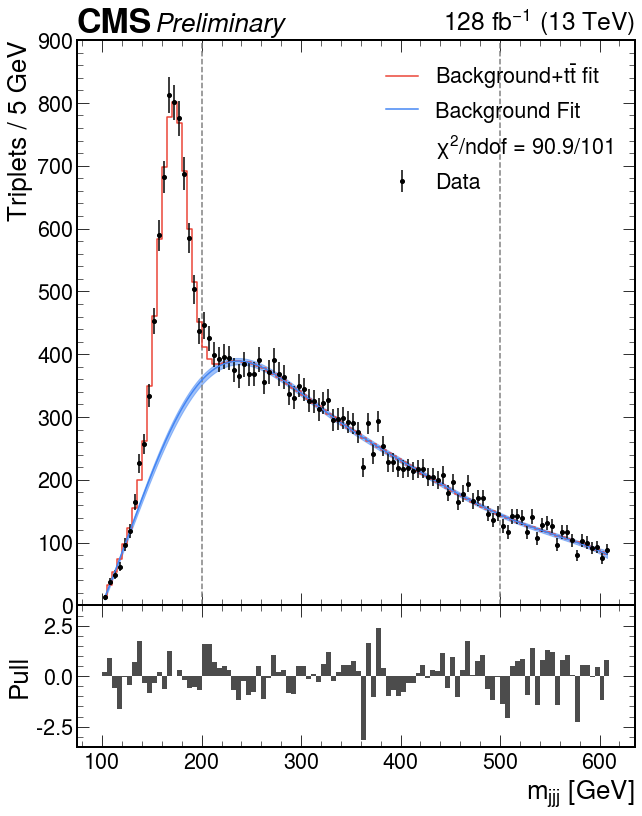

0.03189287551470004 0.9436260147609323


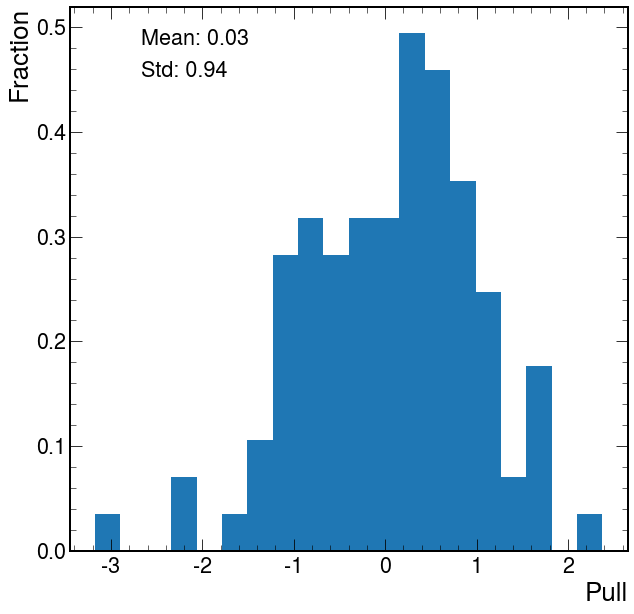

In [7]:
plt.style.use(hep.style.ROOT)
x=[]
y=[]
dy=[]
xc=[]
yc=[]
dyc=[]
h = mass_hists['region_1']['data'].Clone('h_mass')
h.Rebin(2)

# myFile = ROOT.TFile("resolved_FDhist.root", "RECREATE")
# myFile.cd()
# regions[0]['h_a_nq_2017'].
# myFile.Close()  

sig_m=170
sig_s=15
sig_m_bounds=(150,190)
sig_s_bounds=(7, 20)
for i in range(1,h.GetNbinsX()+1):
    if(h.GetBinContent(i)):
        x.append(h.GetBinCenter(i))
        y.append(h.GetBinContent(i))
        dy.append(h.GetBinError(i))
        if((h.GetBinCenter(i)<130 or h.GetBinCenter(i)>210)):
            xc.append(h.GetBinCenter(i))
            yc.append(h.GetBinContent(i))
            dyc.append(h.GetBinError(i))
print(len(x),len(y),len(dy),len(xc),len(yc),len(dyc))


X = np.atleast_2d(x).T
Y = np.atleast_2d(y).T
dy = np.array(dy)

Xc = np.atleast_2d(xc).T
Yc = np.atleast_2d(yc).T
dyc = np.array(dyc)
# kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=40.0, length_scale_bounds=(40, 100.0), nu=11.5)
# kernel = kernel + 
# kernel = C(1.0, (1e-3, 1e3)) * RBF(30, (30, 1e3))

kernel = C(1.0, (1e-3, 1e10)) * RBF(200, (10, 1e16))
gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
gp.fit(Xc, Yc)
print(gp.kernel_)
print('Using Lenght scale', float(str(gp.kernel_).split('=')[-1].split(')')[0]))

ls  = float(str(gp.kernel_).split('=')[-1].split(')')[0])

kernel = C(523**2, "fixed") * RBF(ls, "fixed") + C(1.0, (1e-3, 1e10)) * ESC(mass = sig_m, mass_bounds = sig_m_bounds , width = sig_s, width_bounds = sig_s_bounds)
# Fit for unmasked Data
print(X.shape, Y.shape, dy.shape)
gp = GPnew(kernel=kernel, alpha=dy**2, n_restarts_optimizer=30)
gp.fit(X, Y)
XC = np.atleast_2d(np.linspace(x[0], x[-1], num=1000)).T
Y_pred, sigma = gp.predict(X, return_std=True)
YC_pred, sigmaC = gp.predict(XC, return_std=True)
print(gp.kernel_)
YC_sig, sigmaC_sig = gp.predict_partial(XC,return_std=True,kx = 'k2')
YC_bkg, sigmaC_bkg = gp.predict_partial(XC,return_std=True,kx = 'k1')
Y_sig, sigma_sig = gp.predict_partial(X,return_std=True,kx = 'k2')
Y_bkg, sigma_bkg = gp.predict_partial(X,return_std=True,kx = 'k1')
# kernel = C(0.1, (0.01, 1000.0)) * Matern(length_scale=100.0, length_scale_bounds=(100, 2000.0), nu=10.5)

kernel = C(1.0, (1e-3, 1e10)) * RBF(200, (135, 1e3))
#Fit for masked Data
gp = GaussianProcessRegressor(kernel=kernel, alpha=dyc**2, n_restarts_optimizer=20)
gp.fit(Xc, Yc)
XCc = np.atleast_2d(np.linspace(xc[0], xc[-1], num=1000)).T
Yc_pred, sigmac = gp.predict(Xc, return_std=True)
YCc_pred, sigmaCc = gp.predict(XCc, return_std=True)
Y_p, sig = gp.predict(X, return_std=True)

# with plt.xkcd():
fig = plt.figure(figsize=(10, 13))
spec = fig.add_gridspec(ncols=1, nrows=2,height_ratios=[0.8,0.2])
main = fig.add_subplot(spec[0,0])
hep.cms.label(loc=0,data=True,llabel='Preliminary', rlabel="128 fb$^{-1}$ (13 TeV)")
main.axvline(x=200, color='grey', linestyle='--')
main.axvline(x=500, color='grey', linestyle='--')
main.plot(X.flatten(), Y_pred.flatten(), 'b-',color=cols[1],drawstyle='steps-mid', label=r'Background$+t\bar{t}$ fit')
main.errorbar(X.flatten(), Y.flatten(), dy, fmt='.', color='k',markersize=8,alpha=1.0, label='Data')
main.set_ylabel('Triplets / {} GeV'.format(int(x[1]-x[0])),  fontsize='medium')

main.tick_params(axis='y', )
main.tick_params(axis='x', )
main.plot(XC.flatten(),YC_bkg.flatten(),color=cols[0],label='Background Fit')
xc_sig = np.linspace(195-1.5*16.5, 195+1.5*16.5, 1000)
main.plot(xc_sig,2500*gauss_array(xc_sig,195,16.5,x[1]-x[0]),color=cols[3],label=r'Signal $M_{\tilde{g}} = 200$ GeV') 
xc_sig = np.linspace(290-1.5*23.1, 290+1.5*23.1, 1000)
main.plot(xc_sig,2500*gauss_array(xc_sig,290,23.1,x[1]-x[0]),color=cols[2],label=r'Signal $M_{\tilde{g}} = 300$ GeV') 
xc_sig = np.linspace(387-1.5*29.2, 387+1.5*29.2, 1000)
main.plot(xc_sig,2500*gauss_array(xc_sig,387,29.2,x[1]-x[0]),color=cols[4],label=r'Signal $M_{\tilde{g}} = 400$ GeV') 
main.plot([],[],' ',label=r'$\chi^2$/ndof = {:.1f}/{}'.format(np.sum(((Y.flatten()-Y_pred.flatten())/dy)**2),int(len(x)-1)))
main.fill_between(XC.flatten(),YC_bkg.flatten()-sigmaC_bkg.flatten(),YC_bkg.flatten()+sigmaC_bkg.flatten(),color=cols[0],alpha=.5)
handles,labels = main.get_legend_handles_labels()
handles = [handles[6],handles[0],handles[5],handles[1],handles[2],handles[3],handles[4]]
labels = [labels[6],labels[0],labels[5],labels[1],labels[2],labels[3],labels[4]]
main.legend(handles,labels,loc='upper right', )
# main.legend(loc='best', )
# main.set_yscale('log')
main.set_ylim(0,900)
# main.plot(XCc.flatten(), YCc_pred.flatten()-YC_pred.flatten(), 'm-', label='Difference B/n predictions')
# main.fill_between(XCc.flatten(), (YCc_pred.flatten()-YC_pred.flatten())-1*sigmaCc, (YCc_pred.flatten()-YC_pred.flatten())+1*sigmaCc,alpha=.5, fc='m' )
pull = fig.add_subplot(spec[1,0],sharex=main)
# pull.bar(X.flatten(),((Y.flatten()-Y_bkg.flatten())/dy),width=h_a.GetBinWidth(1),color='r', alpha=1)
pull.bar(X.flatten(),((Y.flatten()-Y_pred.flatten())/dy),width=h.GetBinWidth(1),color='k', alpha=0.7)
pull.set_ylabel('Pull', fontsize='medium', loc='center')
pull.set_xlabel(r'$m_{jjj}$ [GeV]',  fontsize='medium')
pull.set_ylim(-3.5,3.5)
# pull.axvline(x=(95-(2*11)), color='lightgrey', linestyle='--')
# pull.axvline(x=(95+(2*11)), color='lightgrey', linestyle='--')
print(np.sum(((Y.flatten()-Y_pred.flatten())/dy)**2)/(len(x)-1))
print(np.sum(((Y.flatten()-Y_bkg.flatten())/dy)**2)/(len(x)-1))
print(np.sum(((Yc.flatten()-Yc_pred.flatten())/dyc)**2)/(len(x)-1))
# diff = fig.add_subplot(spec[2,0])
# diff.plot(XCc.flatten(), YC_pred.flatten()-YC_bkg.flatten(), 'm-', label='Gaussian')
# # diff.fill_between(XCc.flatten(), (YC_pred.flatten()-YC_bkg.flatten())-1*sigmaCc, (YC_pred.flatten()-YC_bkg.flatten())+1*sigmaCc,alpha=.5, fc='m',label='Error on difference' )
# diff.fill_between(XC.flatten(), np.sqrt(YC_pred.flatten()), -np.sqrt(YC_pred.flatten()),alpha=.4, fc='b' , label='Statistical Error band')
# diff.set_ylabel('Difference',)
# diff.errorbar(xt, yt, dyt, fmt='.',color='b', markersize=8,alpha=1, label='ttbar MC prediction')
# # diff.errorbar(Xc.flatten(), Yc.flatten()-Yc_pred.flatten(), dyc, fmt='.',color='k', markersize=8,alpha=.5)
# diff.errorbar(X.flatten(), Y.flatten()-Y_bkg.flatten(), dy, fmt='.', color='#3c0008',markersize=8,alpha=0.5, label='Data - Prediction')
# diff.errorbar(X.flatten(), Y.flatten()-Y_p.flatten(), dy, fmt='.', color='k',markersize=8,alpha=0.5, label='Data - Prediction')
# diff.legend(loc='right',)
# diff.axvline(x=(95-(2*11)), color='lightgrey', linestyle='--')
# diff.axvline(x=(95+(2*11)), color='lightgrey', linestyle='--')
np.max(YC_pred.flatten()-YC_bkg.flatten())
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('Mass_ranges_1_sig_'+tag+'.pdf',bbox_inches='tight')
plt.show()
fig = plt.figure(figsize=(10,10))
plt.hist(((Y.flatten()-Y_pred.flatten())/dy),bins=20,density=True)
plt.plot([],[],' ',label='Mean: {:.2f}'.format(np.mean(((Y.flatten()-Y_pred.flatten())/dy))))
plt.plot([],[],' ',label='Std: {:.2f}'.format(np.std(((Y.flatten()-Y_pred.flatten())/dy))))
plt.xlabel('Pull',  fontsize='medium')
plt.ylabel('Fraction',)
plt.tick_params(axis='y', )
plt.tick_params(axis='x', )
plt.legend()
print(np.mean(((Y.flatten()-Y_pred.flatten())/dy)),np.std(((Y.flatten()-Y_pred.flatten())/dy)))
# fig.savefig('Mass_ranges_1_pull_'+tag+'.pdf',bbox_inches='tight')